In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_dir = r'training_set'
test_data_dir = r'test_set'

In [3]:
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
epochs = 10
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


250/250 [==============================] - 245s 972ms/step - loss: 0.7115 - accuracy: 0.5019 - val_loss: 0.6893 - val_accuracy: 0.5169
Epoch 2/10
250/250 [==============================] - 122s 486ms/step - loss: 0.6832 - accuracy: 0.5658 - val_loss: 0.6553 - val_accuracy: 0.6513
Epoch 3/10
250/250 [==============================] - 121s 484ms/step - loss: 0.6357 - accuracy: 0.6425 - val_loss: 0.5684 - val_accuracy: 0.7138
Epoch 4/10
250/250 [==============================] - 121s 484ms/step - loss: 0.5789 - accuracy: 0.6926 - val_loss: 0.5460 - val_accuracy: 0.7316
Epoch 5/10
250/250 [==============================] - 125s 499ms/step - loss: 0.5278 - accuracy: 0.7384 - val_loss: 0.5506 - val_accuracy: 0.7316
Epoch 6/10
250/250 [==============================] - 123s 493ms/step - loss: 0.4898 - accuracy: 0.7602 - val_loss: 0.4758 - val_accuracy: 0.7907
Epoch 7/10
250/250 [==============================] - 123s 490ms/step - loss: 0.4539 - accuracy: 0.7865 - val_loss: 0.4602

In [7]:

# Save the model
model.save('cat_dog_classifier.h5')

C:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cat_dog_classifier.h5')

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 55ms/step


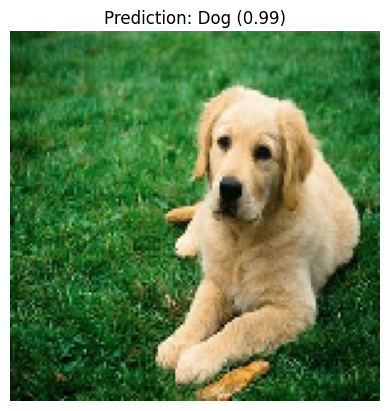

1/1 [==============================] - 0s 60ms/step


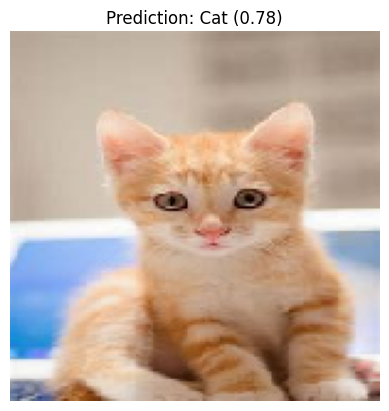

In [16]:
def load_and_predict(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(150, 150))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image
    img_array /= 255.0
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    
    if prediction[0] > 0.5:
        plt.title(f"Prediction: Dog ({prediction[0][0]:.2f})")
    else:
        plt.title(f"Prediction: Cat ({1 - prediction[0][0]:.2f})")
    
    plt.show()

# Replace 'path/to/dog_image.jpg' and 'path/to/cat_image.jpg' with your image paths
dog_image_path = r'dog_2.jpg'
cat_image_path = r'cat_2.jpg'

# Test with dog image
load_and_predict(dog_image_path)

# Test with cat image
load_and_predict(cat_image_path)